# Question 1
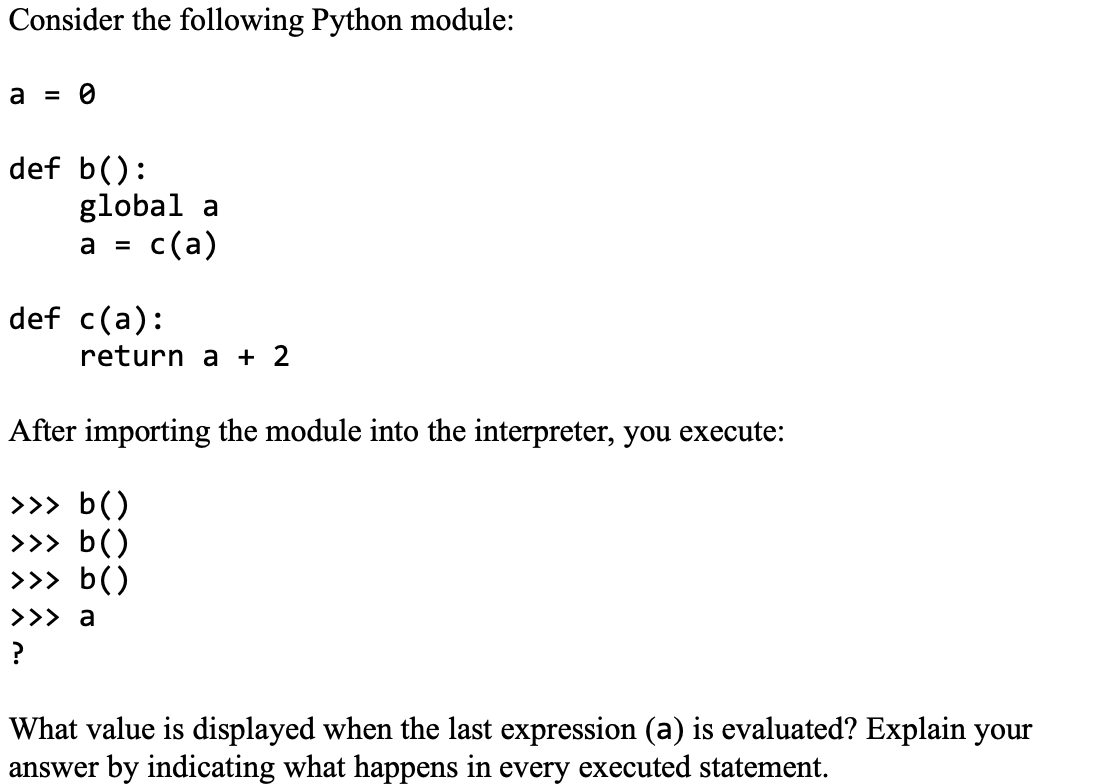

### answer
***
In function b, there is a declaration about the global parameter a. Because of this declaration, function b can directly use param a and pass it to function c which returns a plus 2 as a result.

Therefore, each call to function b will cause global variable a plus 2 in fact. And finally display "6" as a result in step 4.

Detail implementation will be displayed as below:
***

In [1]:
a = 0
def b():
    global a
    a = c(a)
def c(a):
    return a + 2

In [2]:
b()
a

2

In [3]:
b()
a

4

In [4]:
b()
a

6

# question 2
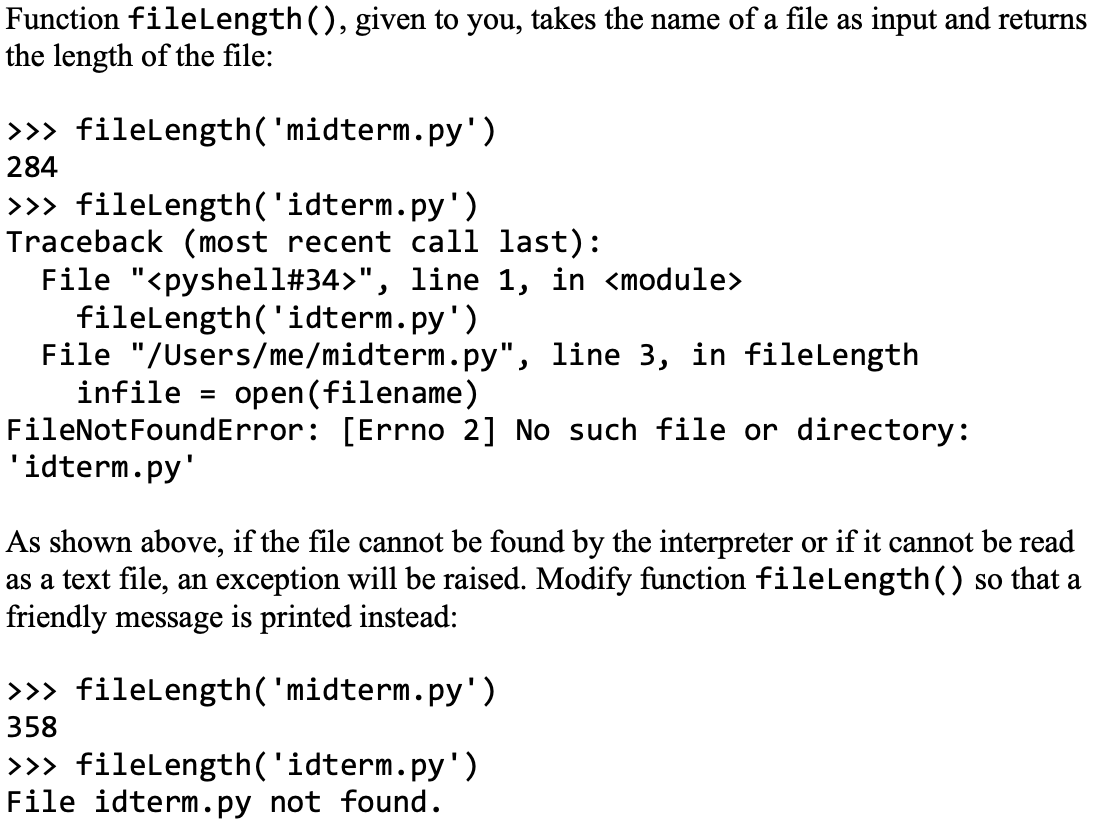

In [5]:
def fileLength(file):
    try:
        with open(file) as f:
            return len(f.readlines())
    except FileNotFoundError:
        return "File " + file + " not found."
    except Exception as e:
        return e

print(fileLength("1.txt"))
print(fileLength("2.txt"))

5
File 2.txt not found.


# question 3
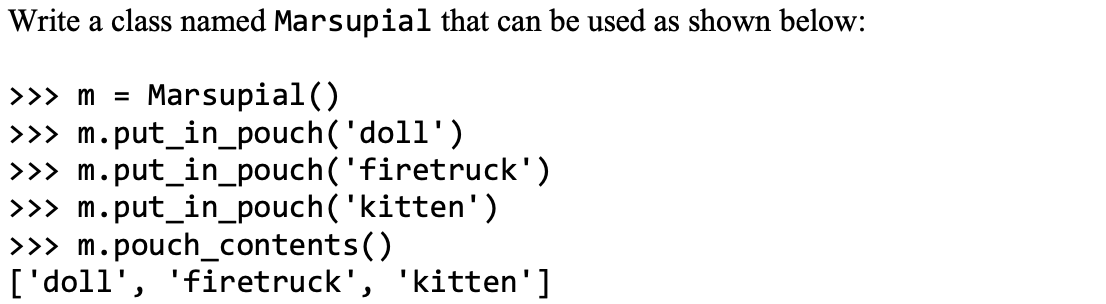
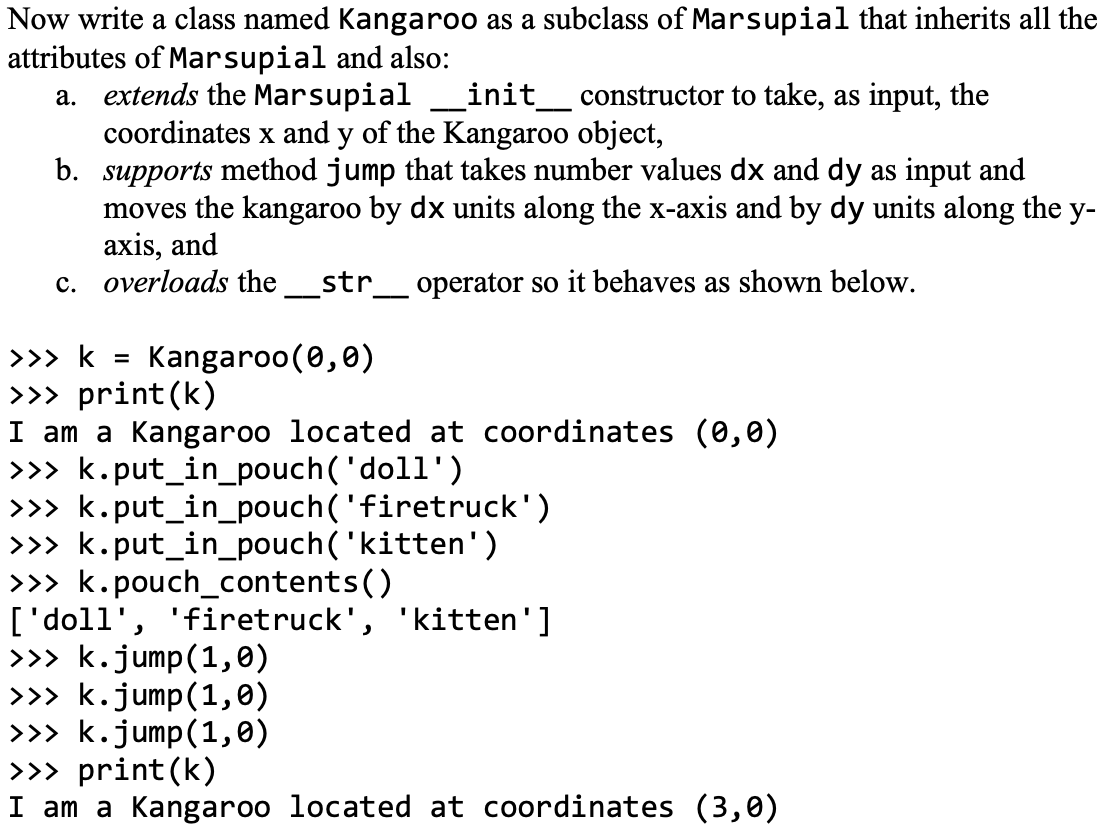

In [6]:
class Marsupial:
    def __init__(self):
        self.lst = []

    def put_in_pouch(self, s):
        self.lst.append(s)
        pass

    def pouch_contents(self):
        print(self.lst)
        pass
    

m = Marsupial()
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')
m.pouch_contents()

['doll', 'firetruck', 'kitten']


In [7]:
class Kangaroo(Marsupial):
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y

    def jump(self, dx, dy):
        self.x += dx
        self.y += dy

    def __str__(self):
        return "I am a Kangaroo located at coordinates (%d,%d)" % (self.x, self.y)


k = Kangaroo(0, 0)
print(k)

k.put_in_pouch('doll')
k.put_in_pouch('firetruck')
k.put_in_pouch('kitten')
k.pouch_contents()

k.jump(1,0)
k.jump(1,0)
k.jump(1,0)
print(k)


I am a Kangaroo located at coordinates (0,0)
['doll', 'firetruck', 'kitten']
I am a Kangaroo located at coordinates (3,0)


# question 4
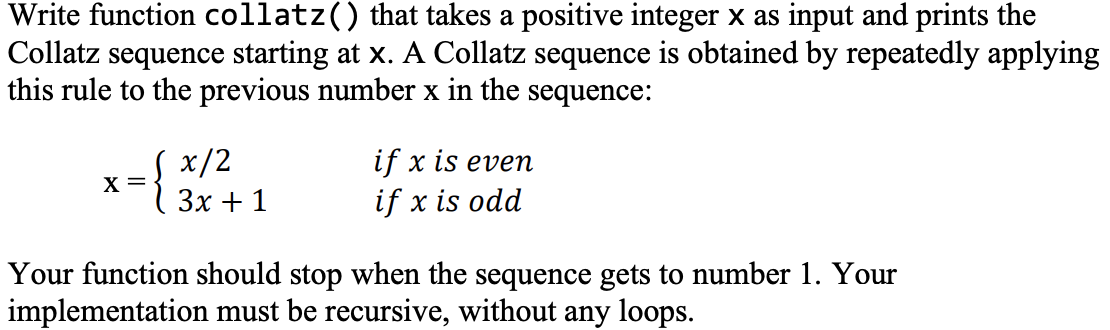
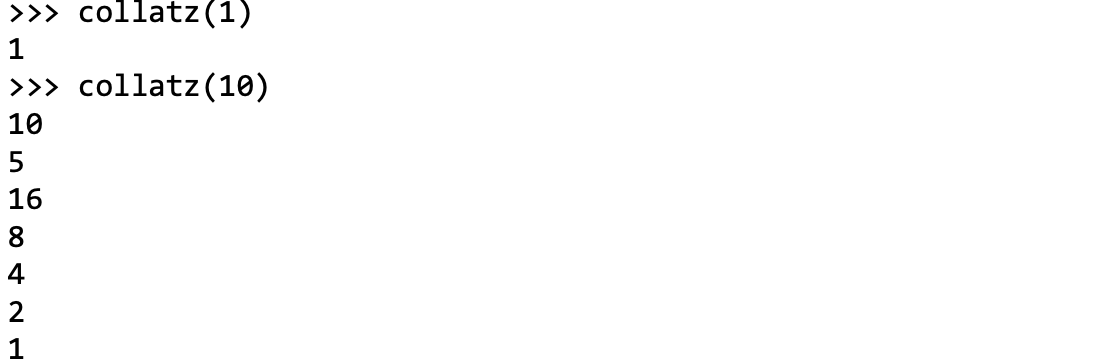

In [8]:
def collatz(x):
    print(x)
    if x == 1:
        return
    if x % 2 == 0:
        x = int(x / 2)
    else:
        x = 3 * x + 1
    collatz(x)


collatz(1)

1


In [9]:
collatz(10)

10
5
16
8
4
2
1


# Question 5
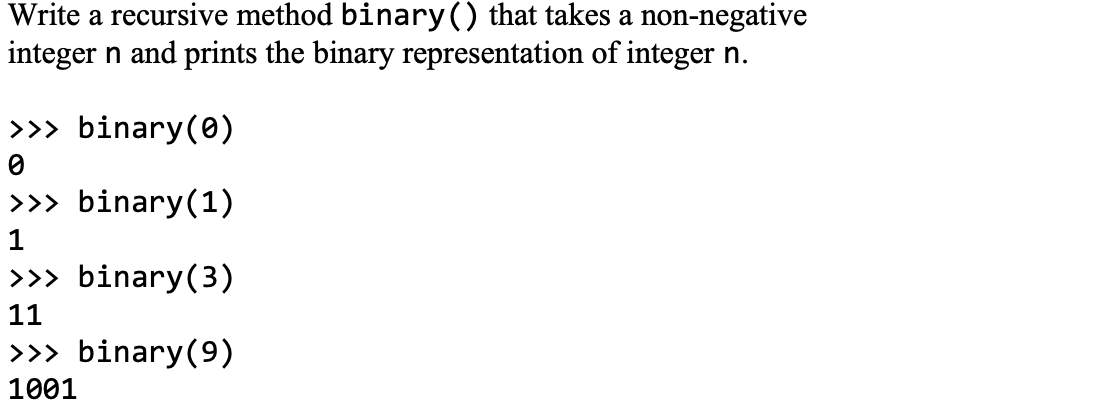

In [10]:
def binary(n):
    print(n % 2, end = '')  # get least bit
    if n > 1:
        binary(n // 2)  # right move

In [11]:
binary(0);print("")
binary(1);print("")
binary(3);print("")
binary(9);print("")

0
1
11
1001


# question 6
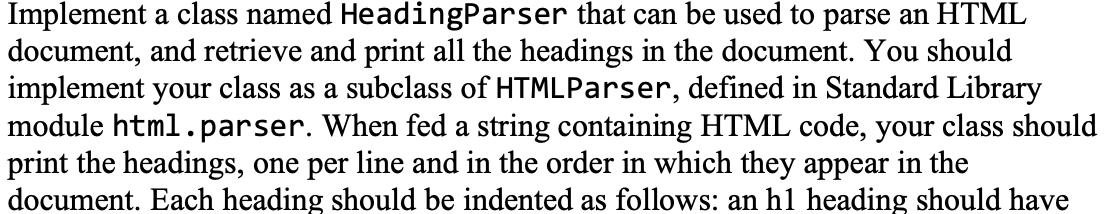
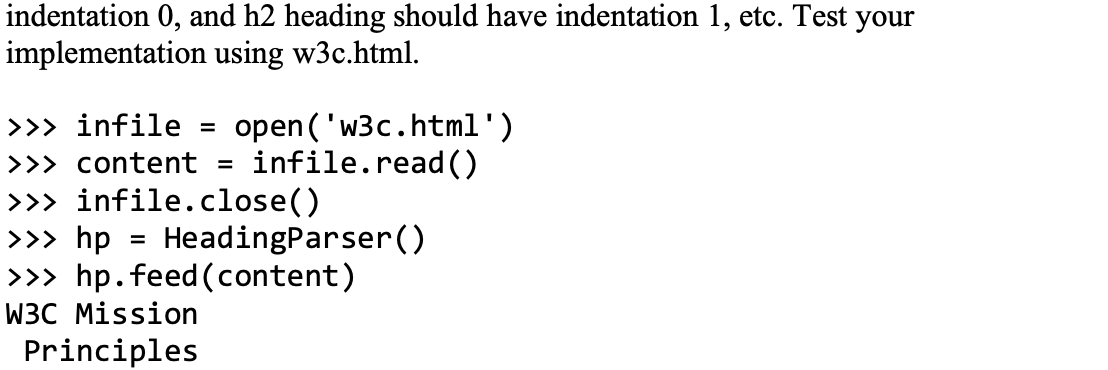

In [12]:
from html.parser import HTMLParser


class HeadingParser(HTMLParser):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.heading_tags = {'h1': 0, 'h2': 1, 'h3': 2, 'h4': 3, 'h5': 4, 'h6': 5}  # HTML heading tags
        self.startHeading = False
        self.indent = 0
        return

    def handle_starttag(self, h, _):
        self.startHeading = h in self.heading_tags.keys()
        if self.startHeading:
            self.indent = self.heading_tags[h]
        return

    def handle_endtag(self, h):
        self.startHeading = not (h in self.heading_tags.keys())
        if self.startHeading:
            self.startHeading = False
        return

    def handle_data(self, data):
        if self.startHeading:
            print(' ' * self.indent + data)
        return


infile = open('w3c.html')
content = infile.read()
infile.close()

hp = HeadingParser()
hp.feed(content)

W3C Mission
 Principles


# question 7
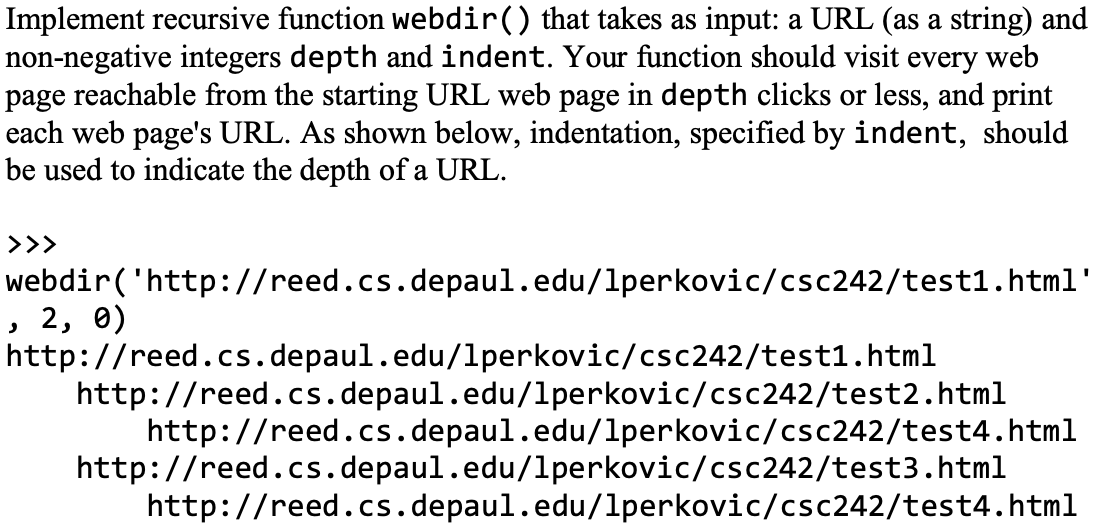

In [13]:
from html.parser import HTMLParser
from urllib.parse import urljoin
from urllib.request import urlopen


class Collector(HTMLParser):
    def __init__(self, url):
        super().__init__()
        self.url0 = url
        self.links = set()

    def handle_starttag(self, tag, attrs):
        if tag == 'a':
            for attr in attrs:
                if attr[0] == "href":
                    if attr[1].startswith("/"):
                        tmp = urljoin(self.url0, attr[1])
                        self.links.add(tmp)
                    elif attr[1].startswith("http"):
                        self.links.add(attr[1])


def webdir(url, depth, indent):
    if depth < 0:
        return
    # if url in visitedLinks:
    #     print("    " * indent + "duplicate: " + url)
    #     return
    else:
        print("    " * indent + url)
        visitedLinks.add(url)
        try:
            resp = urlopen(url)
            encoding = resp.headers.get_content_charset()
            if encoding is None:
                encoding = 'ISO-8859-1'
            content = resp.read()
            content = content.decode(encoding)
            hp = Collector(url)
            hp.feed(content)
            for link in hp.links:
                webdir(link, depth - 1, indent + 1)
        except Exception as e:
            print("    " * indent + str(e) + " " + url)


### HTTP 404 - Page not found - http://reed.cs.depaul.edu/lperkovic/csc242/test1.html
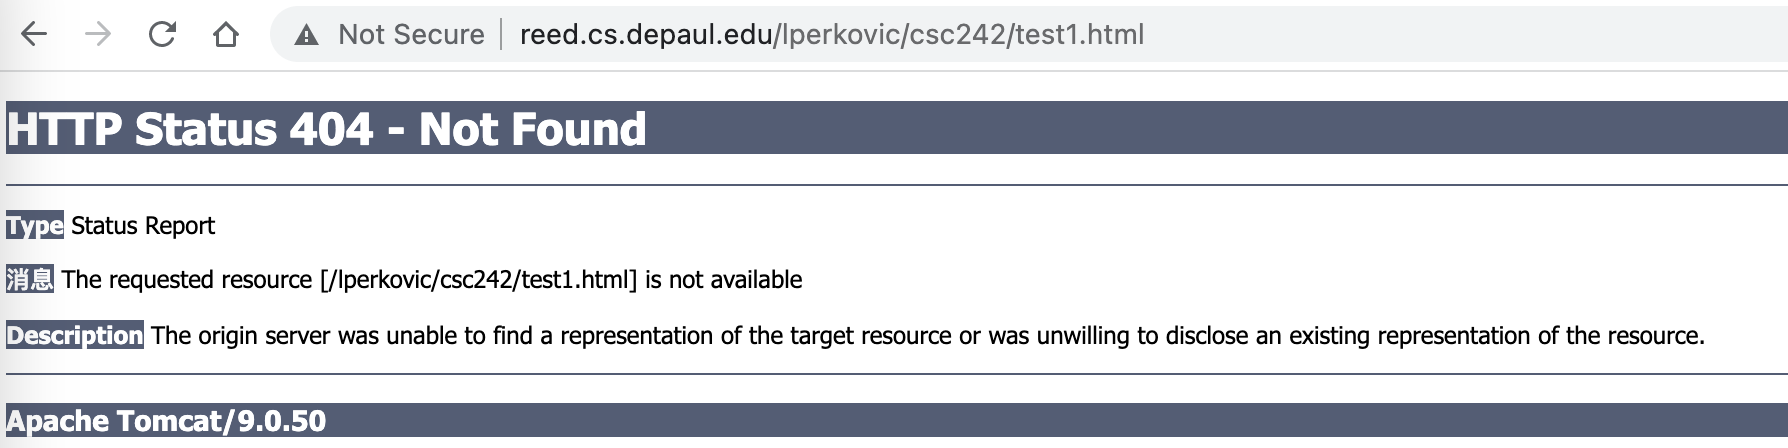

In [14]:
visitedLinks = set()
starting_url = "https://text-compare.com/"
webdir(starting_url, 2, 0)

https://text-compare.com/
    https://text-compare.com/feedback/
        https://text-compare.com/feedback/
        https://text-compare.com/about/
        https://text-compare.com/
    https://text-compare.com/about/
        https://text-compare.com/feedback/
        https://text-compare.com/about/
        https://text-compare.com/
    https://text-compare.com/
        https://text-compare.com/feedback/
        https://text-compare.com/about/
        https://text-compare.com/


# question 8
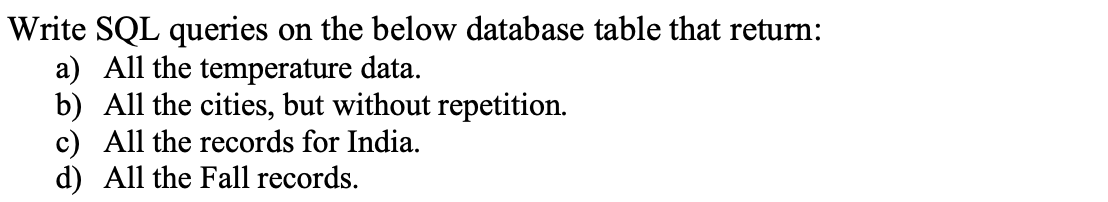
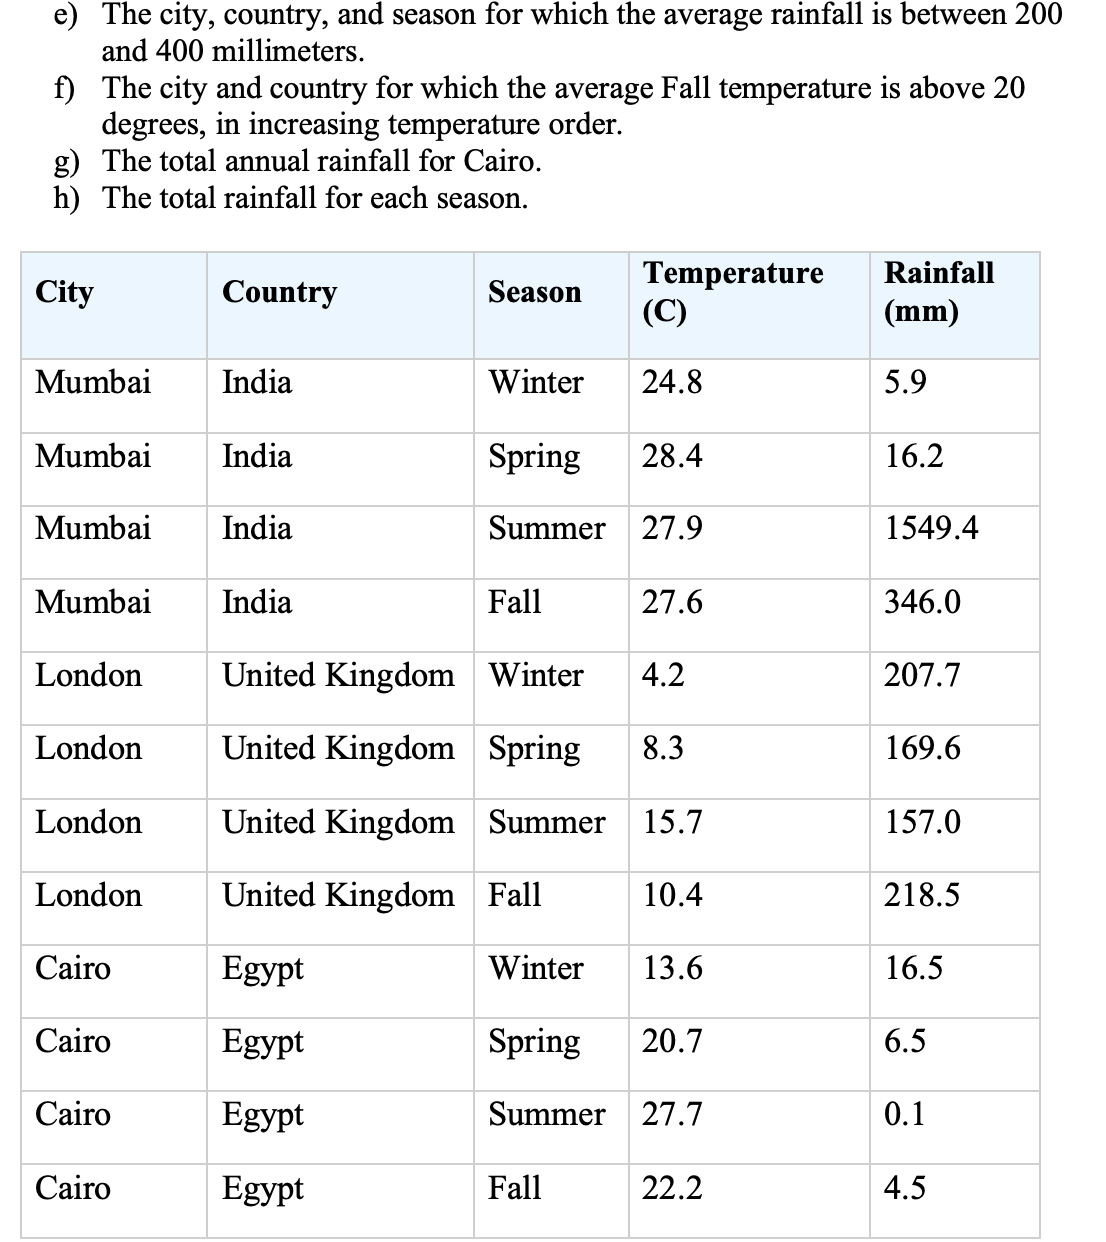

In [15]:
%load_ext sql

In [16]:
%sql sqlite://

In [17]:
%%sql
create table tb
(
    city varchar (6)
    ,country varchar (14)
    ,season varchar (6)
    ,temp float
    ,rain float
);
insert into tb values
('Mumbai', 'India', 'Winter', 24.8, 5.9),
('Mumbai', 'India', 'Spring', 28.4, 16.2),
('Mumbai', 'India', 'Summer', 27.9, 1549.4),
('Mumbai', 'India', 'Fall', 27.6, 346.0),
('London', 'United Kingdom', 'Winter', 4.2, 207.7),
('London', 'United Kingdom', 'Spring', 8.3, 169.6),
('London', 'United Kingdom', 'Summer', 15.7, 157.0),
('London', 'United Kingdom', 'Fall', 10.4, 218.5),
('Cairo', 'Egypt', 'Winter', 13.6, 16.5),
('Cairo', 'Egypt', 'Spring', 20.7, 6.5),
('Cairo', 'Egypt', 'Summer', 27.7, 0.1),
('Cairo', 'Egypt', 'Fall', 22.2, 4.5);

 * sqlite://
Done.
12 rows affected.


[]

## a) All the temperature data.

In [18]:
%%sql
SELECT temp FROM tb;

 * sqlite://
Done.


temp
24.8
28.4
27.9
27.6
4.2
8.3
15.7
10.4
13.6
20.7


## b) All the cities, but without repetition.

In [19]:
%%sql
SELECT distinct city FROM tb;

 * sqlite://
Done.


city
Mumbai
London
Cairo


## c) All the records for India.

In [20]:
%%sql
SELECT *
FROM tb 
where country="India"
;

 * sqlite://
Done.


city,country,season,temp,rain
Mumbai,India,Winter,24.8,5.9
Mumbai,India,Spring,28.4,16.2
Mumbai,India,Summer,27.9,1549.4
Mumbai,India,Fall,27.6,346.0


## d) All the Fall records

In [21]:
%%sql
SELECT *
FROM tb
where season="Fall"
;

 * sqlite://
Done.


city,country,season,temp,rain
Mumbai,India,Fall,27.6,346.0
London,United Kingdom,Fall,10.4,218.5
Cairo,Egypt,Fall,22.2,4.5


## e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.

In [22]:
%%sql
SELECT 
    city
    ,country
    ,season
FROM tb 
where rain>=200 
    and rain<=400
;

 * sqlite://
Done.


city,country,season
Mumbai,India,Fall
London,United Kingdom,Winter
London,United Kingdom,Fall


## f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.

In [23]:
%%sql
SELECT 
    city
    ,country
FROM tb
where season="Fall" 
    and temp>20
order by temp asc
;

 * sqlite://
Done.


city,country
Cairo,Egypt
Mumbai,India


## g) The total annual rainfall for Cairo.

In [24]:
%%sql
SELECT 
    city
    ,country
    ,sum(rain) / count(*) as avg_rainfall
FROM tb
where city="Cairo" 
group by city
;

 * sqlite://
Done.


city,country,avg_rainfall
Cairo,Egypt,6.9


## h) The total rainfall for each season.

In [25]:
%%sql
SELECT 
    season
    ,sum(rain) as total_rainfall
FROM tb
group by season
;

 * sqlite://
Done.


season,total_rainfall
Fall,569.0
Spring,192.29999999999998
Summer,1706.5
Winter,230.1


# question 9
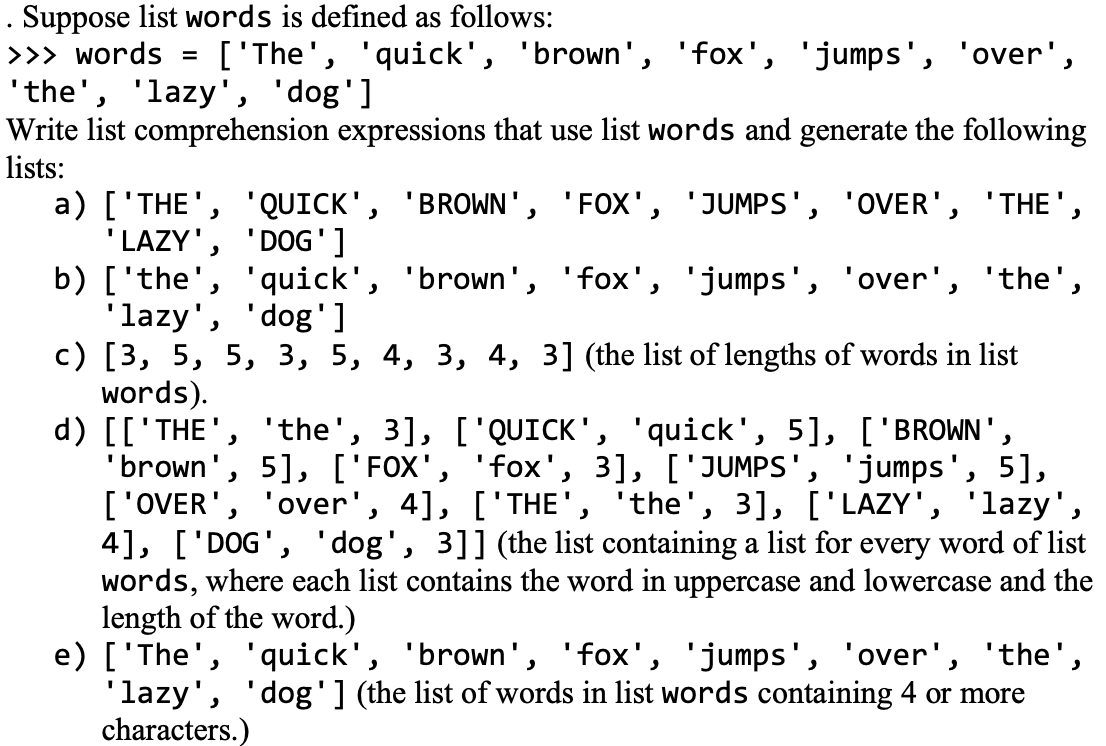

In [26]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

### a) ['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']

In [27]:
[word.upper() for word in words]

['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']

### b) ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

In [28]:
[word.lower() for word in words]

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

### c) [3, 5, 5, 3, 5, 4, 3, 4, 3] (the list of lengths of words in list words).

In [29]:
[len(word) for word in words]

[3, 5, 5, 3, 5, 4, 3, 4, 3]

### d) [['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]] (the list containing a list for every word of list words, where each list contains the word in uppercase and lowercase and the length of the word.)

In [30]:
[[word.upper(),word.lower(),len(word)] for word in words]

[['THE', 'the', 3],
 ['QUICK', 'quick', 5],
 ['BROWN', 'brown', 5],
 ['FOX', 'fox', 3],
 ['JUMPS', 'jumps', 5],
 ['OVER', 'over', 4],
 ['THE', 'the', 3],
 ['LAZY', 'lazy', 4],
 ['DOG', 'dog', 3]]

### e) ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'] (the list of words in list words containing 4 or more characters.)

In [31]:
[word for word in words if len(word)>=4]

['quick', 'brown', 'jumps', 'over', 'lazy']